<a href="https://colab.research.google.com/github/thilankam/GraphNeuralNetwork_PyG/blob/main/Loading_simple_graph_from_CSV_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

1.13.1+cu116
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import pandas as pd
import torch
from torch_geometric.data import Data

In [7]:
node_data = pd.read_csv('/content/sample_data/example.csv')
# /content/sample_data/example.csv

In [8]:
node_data.head

<bound method NDFrame.head of    node_id node_label  source_node  target_node  edge_weight
0        0        red            0            1          0.5
1        1       blue            1            2          0.8
2        2      green            2            3          0.3
3        3        red            3            4          0.9
4        4       blue            4            0          0.2>

In [10]:
# Load the node data from the CSV file
node_data = pd.read_csv('/content/sample_data/example.csv', usecols=['node_id', 'node_label'])

# Convert node labels to numerical values
label_map = {'red': 0, 'blue': 1, 'green': 2}
node_data['node_label'] = node_data['node_label'].map(label_map)

# Convert node data to a PyTorch tensor
x = torch.tensor(node_data[['node_label']].values, dtype=torch.float)

# Load the edge data from the CSV file
edge_data = pd.read_csv('/content/sample_data/example.csv', usecols=['source_node', 'target_node', 'edge_weight'])

# Convert edge data to a PyTorch tensor
edge_index = torch.tensor(edge_data[['source_node', 'target_node']].values.T, dtype=torch.long)
edge_weight = torch.tensor(edge_data['edge_weight'].values, dtype=torch.float)

# Create a PyG Data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_weight)

# Print the PyG Data object
print(data)

Data(x=[5, 1], edge_index=[2, 5], edge_attr=[5])


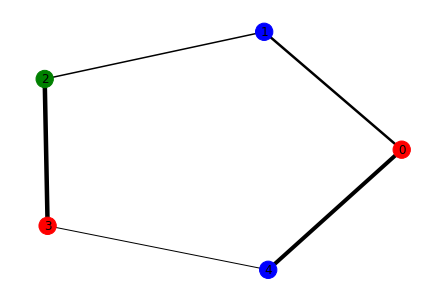

In [11]:
# Vizualize the Graph

import networkx as nx
import matplotlib.pyplot as plt

# Convert edge index to a list of tuples
edge_list = data.edge_index.T.tolist()

# Create a networkx graph from the edge list
G = nx.Graph()
G.add_edges_from(edge_list)

# Set node colors based on their labels
node_colors = ['red' if label == 0 else 'blue' if label == 1 else 'green' for label in node_data['node_label']]

# Set edge widths based on their weights
edge_widths = [weight.item() * 5 for weight in data.edge_attr]

# Draw the graph with node labels, colors, and edge weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, width=edge_widths)

# Show the plot
plt.show()
